Trabalho Prático 1 Aprendizado de máquina: Redes neurais de duas camadas
Aluno: Nélio Cezar Muniz Sampaio
Matrícula: 2015042150

In [29]:
# Importando bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [30]:
# Importando dados
dataset = pd.read_csv('data_tp1')

In [31]:
#Separando em (x, y)
x = dataset.iloc[:, 1:785].values / 255
y = dataset.iloc[:, 0]

In [32]:
# Transformando saída em vetor.
y2 = y
conv_arr = y2.values

d = [ [] for i in range(len(conv_arr))]
for ind, i in enumerate(conv_arr):
    for j in range(10):
        if i==j:
            d[ind].append(1)
        else:
            d[ind].append(0)

df = pd.DataFrame(data=d)

In [33]:
#Separando em conjunto de treino e conjunto de teste
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, df, test_size = 0.2, random_state = 0 )

In [34]:
import keras
from keras.models import Sequential
from keras.layers import Dense


In [35]:
# Inicializando a ANN
classifier = Sequential()

# Adicionando input layer e a hidden layer
# units: neuronios na hidden layer; kernel_initializer: inicializar os pesos aleatoriamente; 
# activation: função de ativação; input_dim: neurônios na input layer.
classifier.add( Dense(units=50, kernel_initializer='uniform', activation='relu', input_dim=784) )

classifier.add( Dense(units=50, kernel_initializer='uniform', activation='relu') )


In [36]:
# Adicionando a output Layer
classifier.add( Dense(units=10, kernel_initializer='uniform', activation='sigmoid') )

In [37]:
# Compilando
classifier.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

In [38]:
history = classifier.fit(x_train, y_train, validation_data = (x_test, y_test), batch_size=32, epochs=50)

Train on 3999 samples, validate on 1000 samples
Epoch 1/50
3999/3999 [==============================] - 0s 89us/step - loss: 0.3854 - acc: 0.8905 - val_loss: 0.3321 - val_acc: 0.9000
Epoch 2/50
3999/3999 [==============================] - 0s 49us/step - loss: 0.2828 - acc: 0.9069 - val_loss: 0.2223 - val_acc: 0.9205
Epoch 3/50
3999/3999 [==============================] - 0s 51us/step - loss: 0.1839 - acc: 0.9321 - val_loss: 0.1573 - val_acc: 0.9416
Epoch 4/50
3999/3999 [==============================] - 0s 52us/step - loss: 0.1389 - acc: 0.9496 - val_loss: 0.1271 - val_acc: 0.9562
Epoch 5/50
3999/3999 [==============================] - 0s 63us/step - loss: 0.1131 - acc: 0.9615 - val_loss: 0.1103 - val_acc: 0.9648
Epoch 6/50
3999/3999 [==============================] - 0s 62us/step - loss: 0.0954 - acc: 0.9688 - val_loss: 0.0959 - val_acc: 0.9684
Epoch 7/50
3999/3999 [==============================] - 0s 62us/step - loss: 0.0826 - acc: 0.9732 - val_loss: 0.0849 - val_acc: 0.9720
Epoch 8

<function matplotlib.pyplot.show(*args, **kw)>

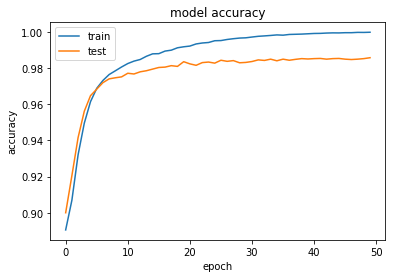

In [39]:
#print(history.history.keys())

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend( ['train', 'test'], loc='upper left' )
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

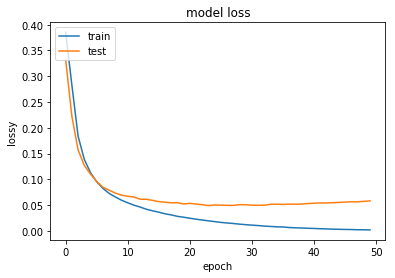

In [40]:
#print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('lossy')
plt.xlabel('epoch')
plt.legend( ['train', 'test'], loc='upper left' )
plt.show

In [44]:
classifier.summary()
#x_train.max()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


1.0